<a href="https://colab.research.google.com/github/lagaleno/ModelgaemTabela/blob/main/ModelagemTabela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem

Equipe *Tabela*:
* Larissa Monteiro da Fonseca Galeno - DRE: 116083017
* Rafael Aguiar - DRE: 117196643

In [77]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive, files
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

## Funções
* `upload_arquivo` : encarregada de pedir ao usuário que selecione o arquivo da sua máquina
* `carregar_CSV` : carregar CSV > retorna dataframe
* `categorico_para_numerico` : gerar matriz numpy numérica (arg) a partir de Data Frame (arg) > retorna np_array e header(nomes de coluna)
* `numerico_para_categorico` : gerar visualização categórica a partir de np_array numerico(arg) e header(arg) > retorna data frame
* `plot_categoria_quatidade` : fazer um plot de gráfico bonitinho

OBS: Transformar Matriz do NumPy em Data Frame do Pandas: `data_frame = pd.DataFrame(numpy_2d_array, columns=column_names)`



In [78]:
def upload_arquivo():
  uploaded = files.upload()

  return list(uploaded)[0]

In [79]:
 def carregar_CSV(nome_arquivo):
  '''
    Recebe o nome do arquivo e retorna o csv como um dataframe para o Pandas utilizar
  '''
  df = pd.read_csv(io.BytesIO(uploaded[nome_arquivo]))

  return df

In [80]:
def categorico_para_numerico(df_categorico, colunas_categoricas):
  '''
    Transformar os dados categoricos (strings, por exemplo) em números, utilizando técnica OnHot
  '''
  df_numerico = pd.get_dummies(df_categorico, columns = colunas_categoricas) # GetDummies https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies
  header_numerico = df_numerico.columns.values # Guardar o Header dos valores numericos
  np_numerico = df_numerico.values # Transforma para formato numpy

  return np_numerico,header_numerico

In [81]:
def numerico_para_categorico(np_numerico, header_numerico):
  '''
    Transformar os dados numericos para categoricos (desfazer o OneHot, nesse caso)
  '''
  ultima_col = ' ' # variavel para auxiliar a juncao do numerico em categorico
  novo_header = [] # novo header categorico
  categoria = {} # dicionario idx_coluna > categoria (para auxiliar segundo loop)
  lista_inicio_fim = [] # lista de inicios e fins (para auxiliar segundo loop)

  for idx,col_name in enumerate(header_numerico): # para cada nome no header numerico
    if '_' in col_name: # se for de categoria binaria (evidenciado pelo '_')
      split_name = col_name.split('_') # pegamos as duas partes
      if split_name[0] == ultima_col: # se estamos no mesmo nome do anterior
        lista_inicio_fim[-1][1] = idx
      else:
        novo_header.append(split_name[0])
        ultima_col = split_name[0]
        lista_inicio_fim.append([idx,idx])
      categoria[idx] = split_name[1]
    else:
      novo_header.append(col_name)

  np_new = np_numerico.astype('object')

  for coluna in lista_inicio_fim:
    for j in range(coluna[0],coluna[1]+1):
      for i in np.where(np_numerico[:,j]==1):
        np_new[i,coluna[0]] = categoria[j]

  colunas_deletadas = []
  for coluna in lista_inicio_fim:
    colunas_deletadas.extend(range(coluna[0]+1,coluna[1]+1))
    
  np_new=np.delete(np_new,colunas_deletadas,1)

  return pd.DataFrame(np_new, columns=novo_header)

In [82]:
def plot_categoria_quatidade(df, coluna):
  '''
    Plota o grafico mostrando quanta cada categoria tem de quantidade
  '''
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])

  np_numerico,header_display = categorico_para_numerico(df[[coluna]],[coluna])

  for idx,s in enumerate(header_display):
    header_display[idx] = s.split('_')[1]

  ax.bar(header_display, np.sum(np_numerico, axis=0))
  plt.plot()

## Uso

Saving sintomas.csv to sintomas (23).csv


,Id do Paciente,Sintomas Corporais,Sintomas Respiratorios
0,0,nenhum,falta de ar
1,1,dor de cabeça,tosse
2,2,nenhum,coriza
3,3,dor muscular,falta de ar
4,4,nenhum,tosse
5,5,dor muscular,tosse
6,6,dor muscular,falta de ar
7,7,nenhum,falta de ar
8,8,nenhum,nenhum
9,9,febre,nenhum


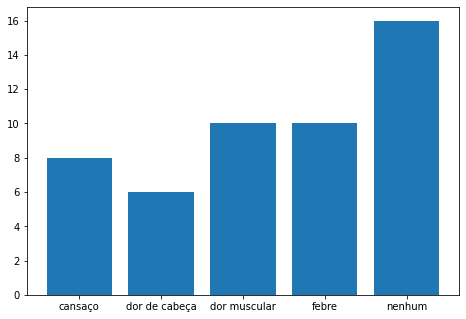

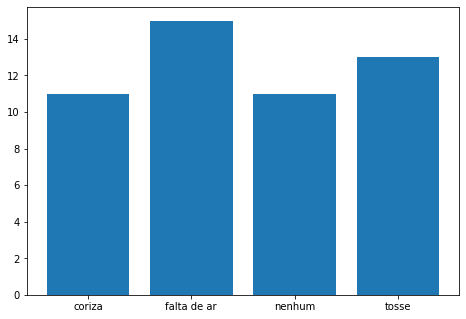

In [83]:
# faz o upload do arquivo da sua máquina
nome_arquivo = upload_arquivo()

# carregar CSV em DataFrame
df = carregar_CSV(nome_arquivo)

# exemplos de Plots Interessantes
plot_categoria_quatidade(df,'Sintomas Corporais')
plot_categoria_quatidade(df,'Sintomas Respiratorios')

# transformacao em matriz do numpy
np_numerico, header_numerico = categorico_para_numerico(df,['Sintomas Corporais','Sintomas Respiratorios'])

# retorno a categorico
df_volta = numerico_para_categorico(np_numerico, header_numerico)

#Mostrar
df_volta.head(10)